# Zusammenhangskomponenten

Modelliert man einen realen Sachverhalt mit einem Graphen, so stellt sich häufig die Frage, ob der enstandene Graph eine homogene Struktur bildet oder in Teile zerfällt. Betrachtet man etwa Geschäftsbeziehungen zwischen Unternehmen und fragt nach Auswirkungen eines möglichen Konkurses, so kann es für die Risikobewertung eines Unternehmens eine erhebliche Rolle spielen, ob es einen Zusammenhang mit der gefährdeten Orgnisation gibt oder nicht.

Eine Reihe von Definitionen, die in der Literatur je nach Zweck leicht abweichen können:
Für einen Graph G=(V,E) heißen zwei Knoten $v_1$ und $v_2$ <b>benachbart</b>, wenn es eine Kante e in E gibt, die die beiden Knoten verbindet.  Manchmal sprechen wir dann auch einfach von Nachbarn (engl. neigbours). Für e=(v,v') bzw. e={v,v'} heißen v bzw v' und e <b>inzident</b> und v und v' <b>adjacent</b>.
Ein <b>Pfad</b> oder auch <b>Weg</b> (engl. path) ist eine Folge von benachbarten Knoten bzw. in diesem Sinne aufeinanderfolgender Kanten. Im gerichteten Fall muss die Richtung der Kanten berücksichtigt werden und wir sprechen von einem gerichteten Weg. Ein Weg heißt <b>einfach</b>, wenn jeder Knoten nur einmal darin auftritt. Ein <b>Kreis</b> oder <b>Zyklus</b> ist ein Weg, der in dem Knoten endet, in dem er begonnen hat. 
Ein Graph heißt <b>zusammenhängend</b> (engl. connected), wenn je zwei Knoten durch einen Weg verbunden sind. In gerichteten Graphen, bei denen jeweils gerichtete Wege existieren, spricht man auch von <b>starkem</b> und <b>schwachem</b> Zusammenhang. Ersterer berücksichtigt die Orientierung der Kanten, zweiterer nicht.

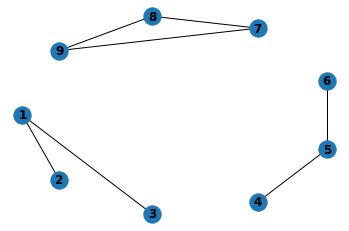

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
g=nx.Graph()
for i in range(1,8):
    g.add_node(1)
g.add_edges_from([(1,2),(1,3),(4,5),(5,6),(5,6),(7,8),(8,9),(7,9)])
plt.subplot(111)
nx.draw_shell(g, nlist=[range(1, 10)], with_labels=True, font_weight='bold')

In diesem Graphen gibt es drei zusammenhängende Areale. Die Knoten 7,8 und 9 bilden einen (einfachen) Kreis (Warum ist der einfach?). Es gibt (einfache) Wege von z.B. 4 nach 6 und 2 nach 3.

Die zusammenhängenden Areale nennen wir jetzt Zusammenhangskomponenten. Formal ist eine Zusammenhangskomponente von $G=(V,E)$ ein Teilgraph $T=(V_T,E_T)$ von G mit $V_T\subseteq V$ und $E_T\subseteq E$, der zusammenhängend ist und maximal in dieser Eigenschaft. Das heißt, wenn man einen weiteren Knoten aus $V\backslash V_T$ (mit seinen inzidierenden Kanten) zu $V_T$ hinzufügt, so ist der entstehende Graph nicht mehr zusammenhängend.

Interessant ist nun die Frage, wie die Zusammenhangskomponenten in großen Graphen aussehen bzw. weche Gestalt sie zum Beispiel in Zufallsgraphen haben.

In [5]:
print("Anzahl der Zusammenhangskomponenten in g:") 
print(nx.number_connected_components(g))
print("Die Komponenten:")
print([c for c in nx.connected_components(g)])

Anzahl der Zusammenhangskomponenten in g:
3
Die Komponenten:
[{1, 2, 3}, {4, 5, 6}, {8, 9, 7}]


Zusammenhangskomponenten können mit BFS oder DFS berechnet werden. Dabei ist dies in einem umgerichteten Graphen über Adjazenzlisten in Knoten in O(|E|) möglich. Im gerichteten Fall liegt der Aufwand (dann für starke Zusammenhangskomponenten ) bei $O(|V|+|E|)$ [siehe etwa: Krumke, Noltemeier: Graphentheoretische Konzepte und Algorithmen, Heidelberg 2009]
Effizienter und parallelisierbar geht das mit einem Verfahren, das den transitiven Abschluss der Adjazenzmatrix berechnet [Hirschberg, Chandra, Sarwate: Computing Connected Components on Parallel Computers, Communications of the ACM,August 1979].

Strukturen, die Zusammenhänge der realen Welt abbilden, besitzen häufig eine große Komponente (giant component), die eine signifikante Anzahl der Knoten enthält (meist eine solche, kaum mehrere: ein "Zusammenwachsen" zweier großer Komponenten wäre wahrscheinlich) und weitere, kleinere Komponenten. 

Erdös und Rényi haben gezeigt, dass in einem ER(n,p) Graph gilt:

+ Für $np<1$ hat der Graph mit hoher Wahrscheinlichkeit keine Komponente mit mehr als O(log(n)) Knoten.
+ Für $np=1$ hat der Graph mit hoher Wahrscheinlichkeit eine große Komponente mit $n^\frac{2}{3}$ Knoten.
+ Für $np \to c>1$ hat der Graph mit hoher Wahrscheinlichkeit eine große Komponente und alle anderen Komponenten werden weniger als O(log(n)) Knoten enthalten.

Der Ausdruck "mit hoher Wahrscheinlichkeit" bedeutet, dass die Wahrscheinlichkeit des beschriebenen Ereignisses für wachsendes n immer näher bei 1 liegt. 

Die Bibliothek <i>networkx</i> bietet eine Funktion für die Erzeugung eines ER-Graphen.

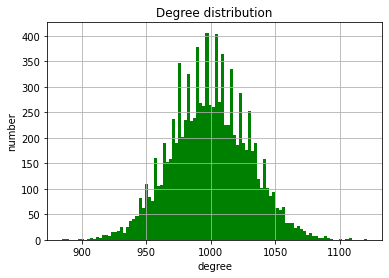

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
def getDegreeDistribution(g):
    result=[]
    for i in list(g.nodes):
        result.append(g.degree(i))
    return result

g= nx.fast_gnp_random_graph(10000, 0.1)
x=getDegreeDistribution(g)
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=1)
plt.xlabel('degree')
plt.ylabel('number')
plt.title('Degree distribution')
plt.grid(True)
plt.show()

In [7]:
print([len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)])

[10000]


Vergleich verschiedener Werte von n und p:

In [8]:
sizes=[100,1000,10000]
probs=[0.001]
for n in sizes:
    for p in probs:
        g=nx.fast_gnp_random_graph(n,p)
        print([len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)])

[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[140, 51, 23, 20, 14, 13, 12, 12, 12, 10, 10, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Experiment:
Ein Graph $G=(V,E)$ mit $|E|=m$ soll konstruiert werden. Sei Knoten aus $V$ dürfen maximal mit einer Kante verbunden sein. 
Für jedes $e \in E$ werden zufällig zwei Elemente $v, v'$ aus $V$ gezogen.
Falls es noch keine Kante zwischen den beiden Knoten gibt, so wird $v$ Startknoten und $v'$ Endknoten von $e$.
Sind die beiden Knoten bereits verbunden, passiert nichts und es wird weiter gezogen.
+  Vergleichen Sie:
    es wird gezogen, bis m Kanten in E sind mit es wird m mal gezogen
+  Was passiert bei verschiedenen Werten von m und n?
+  Wie sieht die Gradverteilung aus?

In [9]:
import random
m=1000
n=1000
g=nx.Graph()
for i in range(m):
    e=random.sample(range(n),2)
    g.add_edge(e[0],e[1])
    print(g.edges)
x=getDegreeDistribution(g)
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=1)
plt.xlabel('degree')
plt.ylabel('number')
plt.title('Degree distribution')
plt.grid(True)
plt.show()

[(630, 155)]
[(630, 155), (699, 568)]
[(630, 155), (699, 568), (49, 309)]
[(630, 155), (699, 568), (49, 309), (450, 297)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690), (913, 582)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690), (913, 582), (980, 150)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690), (913, 582), (980, 150), (369, 589)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690), (913, 582), (980, 150), (369, 589), (278, 786)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (342, 211), (262, 690), (913, 582), (980, 150), (369, 589), (278, 786), (308, 875)]
[(630, 155), (699, 568), (49, 309), (450, 297), (940, 190), (3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

